# MOC and PHT

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6plot import xyplot, yzplot 
from mom6_tools.m6toolbox import genBasinMasks
warnings.filterwarnings("ignore")

Basemap module not found. Some regional plots may not function properly


In [2]:
path = '/glade/scratch/gmarques/'
path2 = '/glade/u/home/gmarques/Notebooks/CESM_MOM6/temporary/MOC_analysis/'
base = 'g.c2b6.GJRA.TL319_t061.long_JRA_mct.0'
labels = ['20','61','64','67','68','69']
exps = []
for i in labels:
  exps.append(base+i)

In [3]:
grd = MOM6grid('/glade/scratch/gmarques/'+str(exps[0])+'/run/'+str(exps[0])+'.mom6.static.nc')
depth = grd.depth_ocean
# remote Nan's, otherwise genBasinMasks won't work
depth[np.isnan(depth)] = 0.0
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth, xda=True)

MOM6 grid successfully loaded... 

11.16427964664149 64.78854837178643 [391, 434]


# AMOC

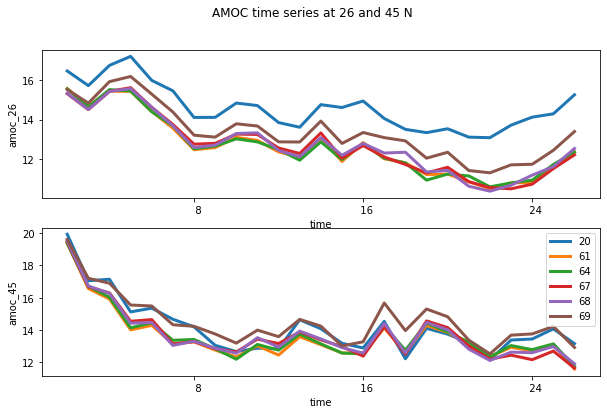

In [4]:
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
plt.suptitle('AMOC time series at 26 and 45 N')
for i in range(len(labels)):
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_MOC.nc')
  ds.amoc_26.sel(time=slice('0001-01-01','0026-01-01')).plot(ax=ax[0],label=labels[i], lw=3)
  ds.amoc_45.sel(time=slice('0001-01-01','0026-01-01')).plot(ax=ax[1],label=labels[i], lw=3)

ax[1].legend()

# Poleward Heat Transport    

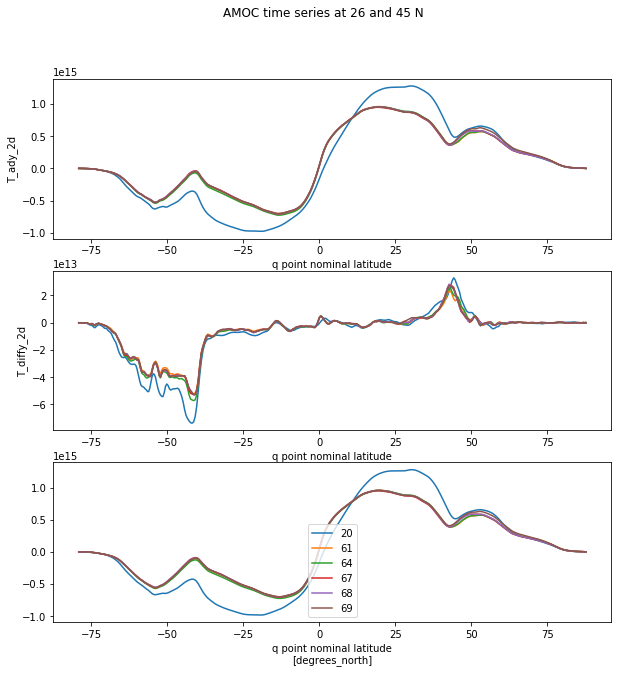

In [5]:
%matplotlib inline

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
plt.suptitle('AMOC time series at 26 and 45 N')
for i in range(len(labels)):
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_heat_transport.nc')
  ds['T_ady_2d'].sum('xh').plot(ax=ax[0],label=labels[i])
  ds['T_diffy_2d'].sum('xh').plot(ax=ax[1],label=labels[i])
  (ds['T_ady_2d']+ds['T_diffy_2d']).sum('xh').plot(ax=ax[2],label=labels[i])

ax[2].legend()